In [540]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
import seaborn as sns


Task 1

In [541]:
df = pd.read_csv('possum.csv')
df.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [542]:
df["Pop"].unique()

array(['Vic', 'other'], dtype=object)

In [543]:
le = LabelEncoder()
le.fit(df["Pop"])
le.classes_

array(['Vic', 'other'], dtype=object)

In [544]:
df["Pop_N"] = le.transform(df["Pop"])

In [545]:
df_data = df.drop(['case', 'Pop', 'sex', 'age'], axis=1)
df_data.dropna(inplace=True)
df_data.describe()


,site,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly,Pop_N
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.0000,103.000000,103.000000
mean,3.640777,92.643689,56.882524,87.128155,37.014563,68.459223,48.206796,15.037864,27.0000,32.606796,0.563107
std,2.355030,3.566392,3.128629,4.312486,1.968448,4.395306,4.055310,1.052086,2.0556,2.767680,0.498427
min,1.000000,82.500000,50.000000,75.000000,32.000000,60.300000,41.300000,12.800000,22.0000,25.000000,0.000000
25%,1.000000,90.700000,54.950000,84.000000,35.750000,64.600000,44.850000,14.400000,25.5000,31.000000,0.000000
50%,3.000000,92.800000,56.300000,88.000000,37.000000,68.000000,46.800000,14.900000,27.0000,32.500000,1.000000
75%,6.000000,94.750000,58.100000,90.000000,38.000000,72.500000,52.000000,15.700000,28.0000,34.250000,1.000000
max,7.000000,103.100000,68.600000,96.500000,43.000000,77.900000,56.200000,17.800000,32.0000,40.000000,1.000000


In [546]:
desired_data = df_data["Pop_N"]
df_data = df_data.drop(["Pop_N"], axis=1)

In [547]:
X_train, X_test, y_train, y_test = train_test_split(df_data, desired_data, test_size=0.20, random_state=42)

In [548]:
(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

((82, 10), (82,), (21, 10), (21,))

In [549]:
lda = LinearDiscriminantAnalysis()

In [550]:

fit_res = lda.fit_transform(X_train, y_train)

In [551]:
y_pred = lda.predict(X_test)
y_pred

array([0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1])

In [552]:
result_df = pd.DataFrame({
    "y_test": y_test,
    "y_pred": y_pred
})
result_df

,y_test,y_pred
30,0,0
68,1,1
63,1,1
48,1,1
43,0,0
41,0,0
91,1,1
46,1,1
10,0,0
0,0,0


In [553]:
accuracy_score(y_test, y_pred)

1.0

In [554]:
lda.coef_

array([[ 5.6889622 ,  1.48645157,  0.68192031,  0.04311055,  2.59131171,
        -2.62364925, -4.11566409,  1.00179463, -0.5241483 ,  0.07653346]])

<Axes: >

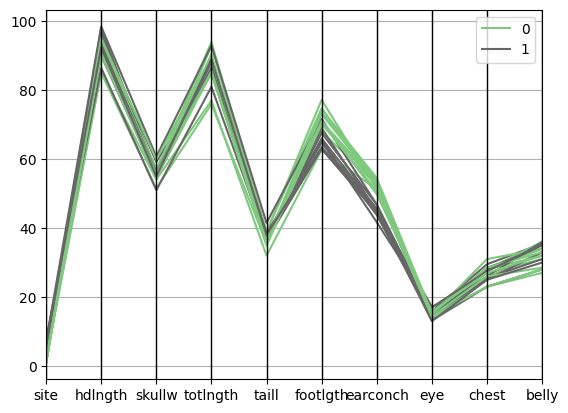

In [556]:
from pandas.plotting import parallel_coordinates

x_dat = X_test
x_dat['p'] = y_pred

parallel_coordinates(x_dat, 'p', colormap="Accent")


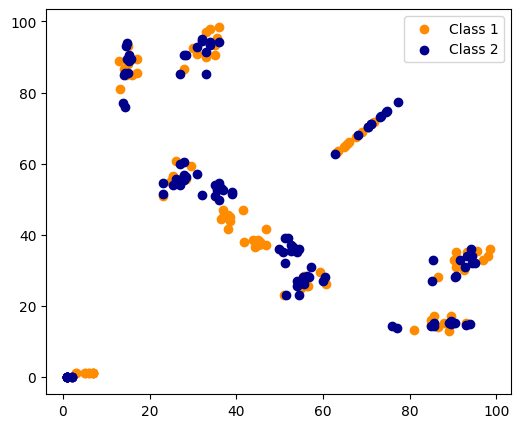

In [590]:
plt.figure(figsize=(6,5))
plt.scatter(x_dat[x_dat['p']==1].iloc[:,0:10], x_dat[x_dat['p']==1].iloc[:,10:0:-1], label='Class 1', c='darkorange')
plt.scatter(x_dat[x_dat['p']==0].iloc[:,0:10], x_dat[x_dat['p']==0].iloc[:,10:0:-1], label='Class 2', c='darkblue')
plt.legend()
plt.show()
